# 1083 Albumin Initial ML

### By: Ian Weimer

In [81]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.9.1


In [82]:
#print("Imbalanced-Learn", imbalanced-learn.__version__)

## Imports

In [83]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
import graphviz
import pydotplus
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [84]:
df = pd.read_csv('/Users/ianweimer/desktop/jupyternotebooks/1083-albumin-data-exploration/ML/tables/albumin_cleaned_11.csv')

In [85]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [86]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  beta_blocker  \
0               2.9            0.0      1          0             1   
1               3.1            0.0      0          1             0   
2               2.2            0.0      0          1             0   
3               1.5            0.0      0          1             0   
4               3.5            1.0      1          0             1   

   hemorrhagic  SAPS  30_day_mortality  30_day_readmission  LOS_days  
0            0    34                 0                   0         2  
1            0    18                 0                   1         2  
2            0    29                 0                   0         2  
3            0    43                 0                   0         1  
4            0    34                 0                   1         2

In [87]:
df.shape

(61109, 15)

In [88]:
df.drop(columns=['30_day_readmission', 'LOS_days'], inplace=True)

In [89]:
# remove non-baseline variables

df.drop(columns=['ICU', 'total_transfusions', 'mass_transfusion', 'beta_blocker', 'Cirrhosis', 'hemorrhagic', 'bl_albumin_value'], inplace=True)

In [90]:
df.describe()

anemia_status           CCI  albumin_24hrs         qSOFA          SAPS  \
count   61109.000000  61109.000000   61109.000000  61109.000000  61109.000000   
mean        1.701795      3.979414       0.084996      0.504787     26.358818   
std         1.116495      2.733080       0.278878      0.697482     11.067891   
min         0.000000      0.000000       0.000000      0.000000      0.000000   
25%         1.000000      2.000000       0.000000      0.000000     18.000000   
50%         2.000000      4.000000       0.000000      0.000000     25.000000   
75%         3.000000      6.000000       0.000000      1.000000     33.000000   
max         3.000000     19.000000       1.000000      3.000000     64.000000   

       30_day_mortality  
count      61109.000000  
mean           0.085699  
std            0.279922  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [91]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

## Modeling

In [92]:
# establish target feature, LOS_days, as y feature
y = df['30_day_mortality']
# drop target feature from features dataframe
X = df.drop(columns = ['30_day_mortality'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [93]:
cols

Index(['anemia_status', 'CCI', 'albumin_24hrs', 'qSOFA', 'SAPS'], dtype='object')

## Standardize Data

In [94]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [95]:
X.head()

anemia_status  CCI  albumin_24hrs  qSOFA  SAPS
0            2.0    6            0.0      1    34
1            0.0    4            0.0      0    18
2            1.0    3            0.0      0    29
3            3.0    2            0.0      0    43
4            0.0    4            1.0      1    34

In [96]:
X.shape

(61109, 5)

## Train Test Split

In [97]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [98]:
sm = SMOTEN(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [99]:
y_train.value_counts()

0    44723
1    44723
Name: 30_day_mortality, dtype: int64

In [100]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [101]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: anemia_status Score: -0.12167
Feature: CCI Score: 0.09137
Feature: albumin_24hrs Score: 0.34203
Feature: qSOFA Score: 0.24828
Feature: SAPS Score: 0.01767


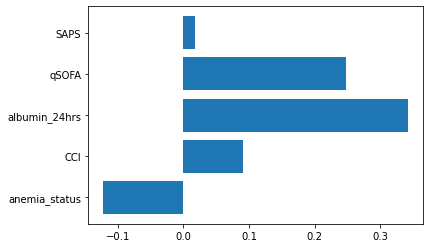

In [102]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

               Importance
albumin_24hrs    1.407803
qSOFA            1.281824
CCI              1.095675
SAPS             1.017824
anemia_status    0.885444


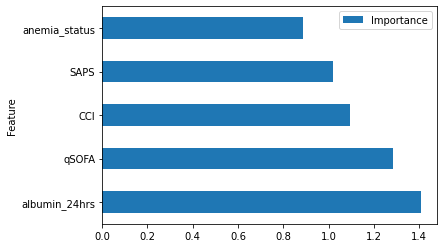

In [103]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [104]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [105]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[31685 13038]
 [14837 29886]]


In [106]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69     44723
           1       0.70      0.67      0.68     44723

    accuracy                           0.69     89446
   macro avg       0.69      0.69      0.69     89446
weighted avg       0.69      0.69      0.69     89446



In [107]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7928 3221]
 [ 360  713]]


In [108]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     11149
           1       0.18      0.66      0.28      1073

    accuracy                           0.71     12222
   macro avg       0.57      0.69      0.55     12222
weighted avg       0.89      0.71      0.77     12222



## 1: Decision Tree (Max Depth=3)

In [109]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Feature: anemia_status Score: 0.06204
Feature: CCI Score: 0.24685
Feature: albumin_24hrs Score: 0.00000
Feature: qSOFA Score: 0.14225
Feature: SAPS Score: 0.54886


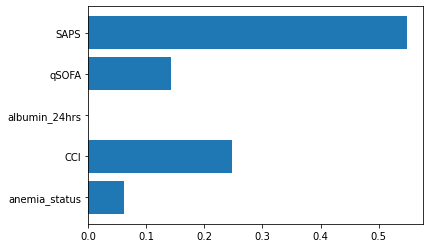

In [110]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [111]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [112]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[26007 18716]
 [11742 32981]]


In [113]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63     44723
           1       0.64      0.74      0.68     44723

    accuracy                           0.66     89446
   macro avg       0.66      0.66      0.66     89446
weighted avg       0.66      0.66      0.66     89446



In [114]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[6463 4686]
 [ 318  755]]


In [115]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72     11149
           1       0.14      0.70      0.23      1073

    accuracy                           0.59     12222
   macro avg       0.55      0.64      0.48     12222
weighted avg       0.88      0.59      0.68     12222



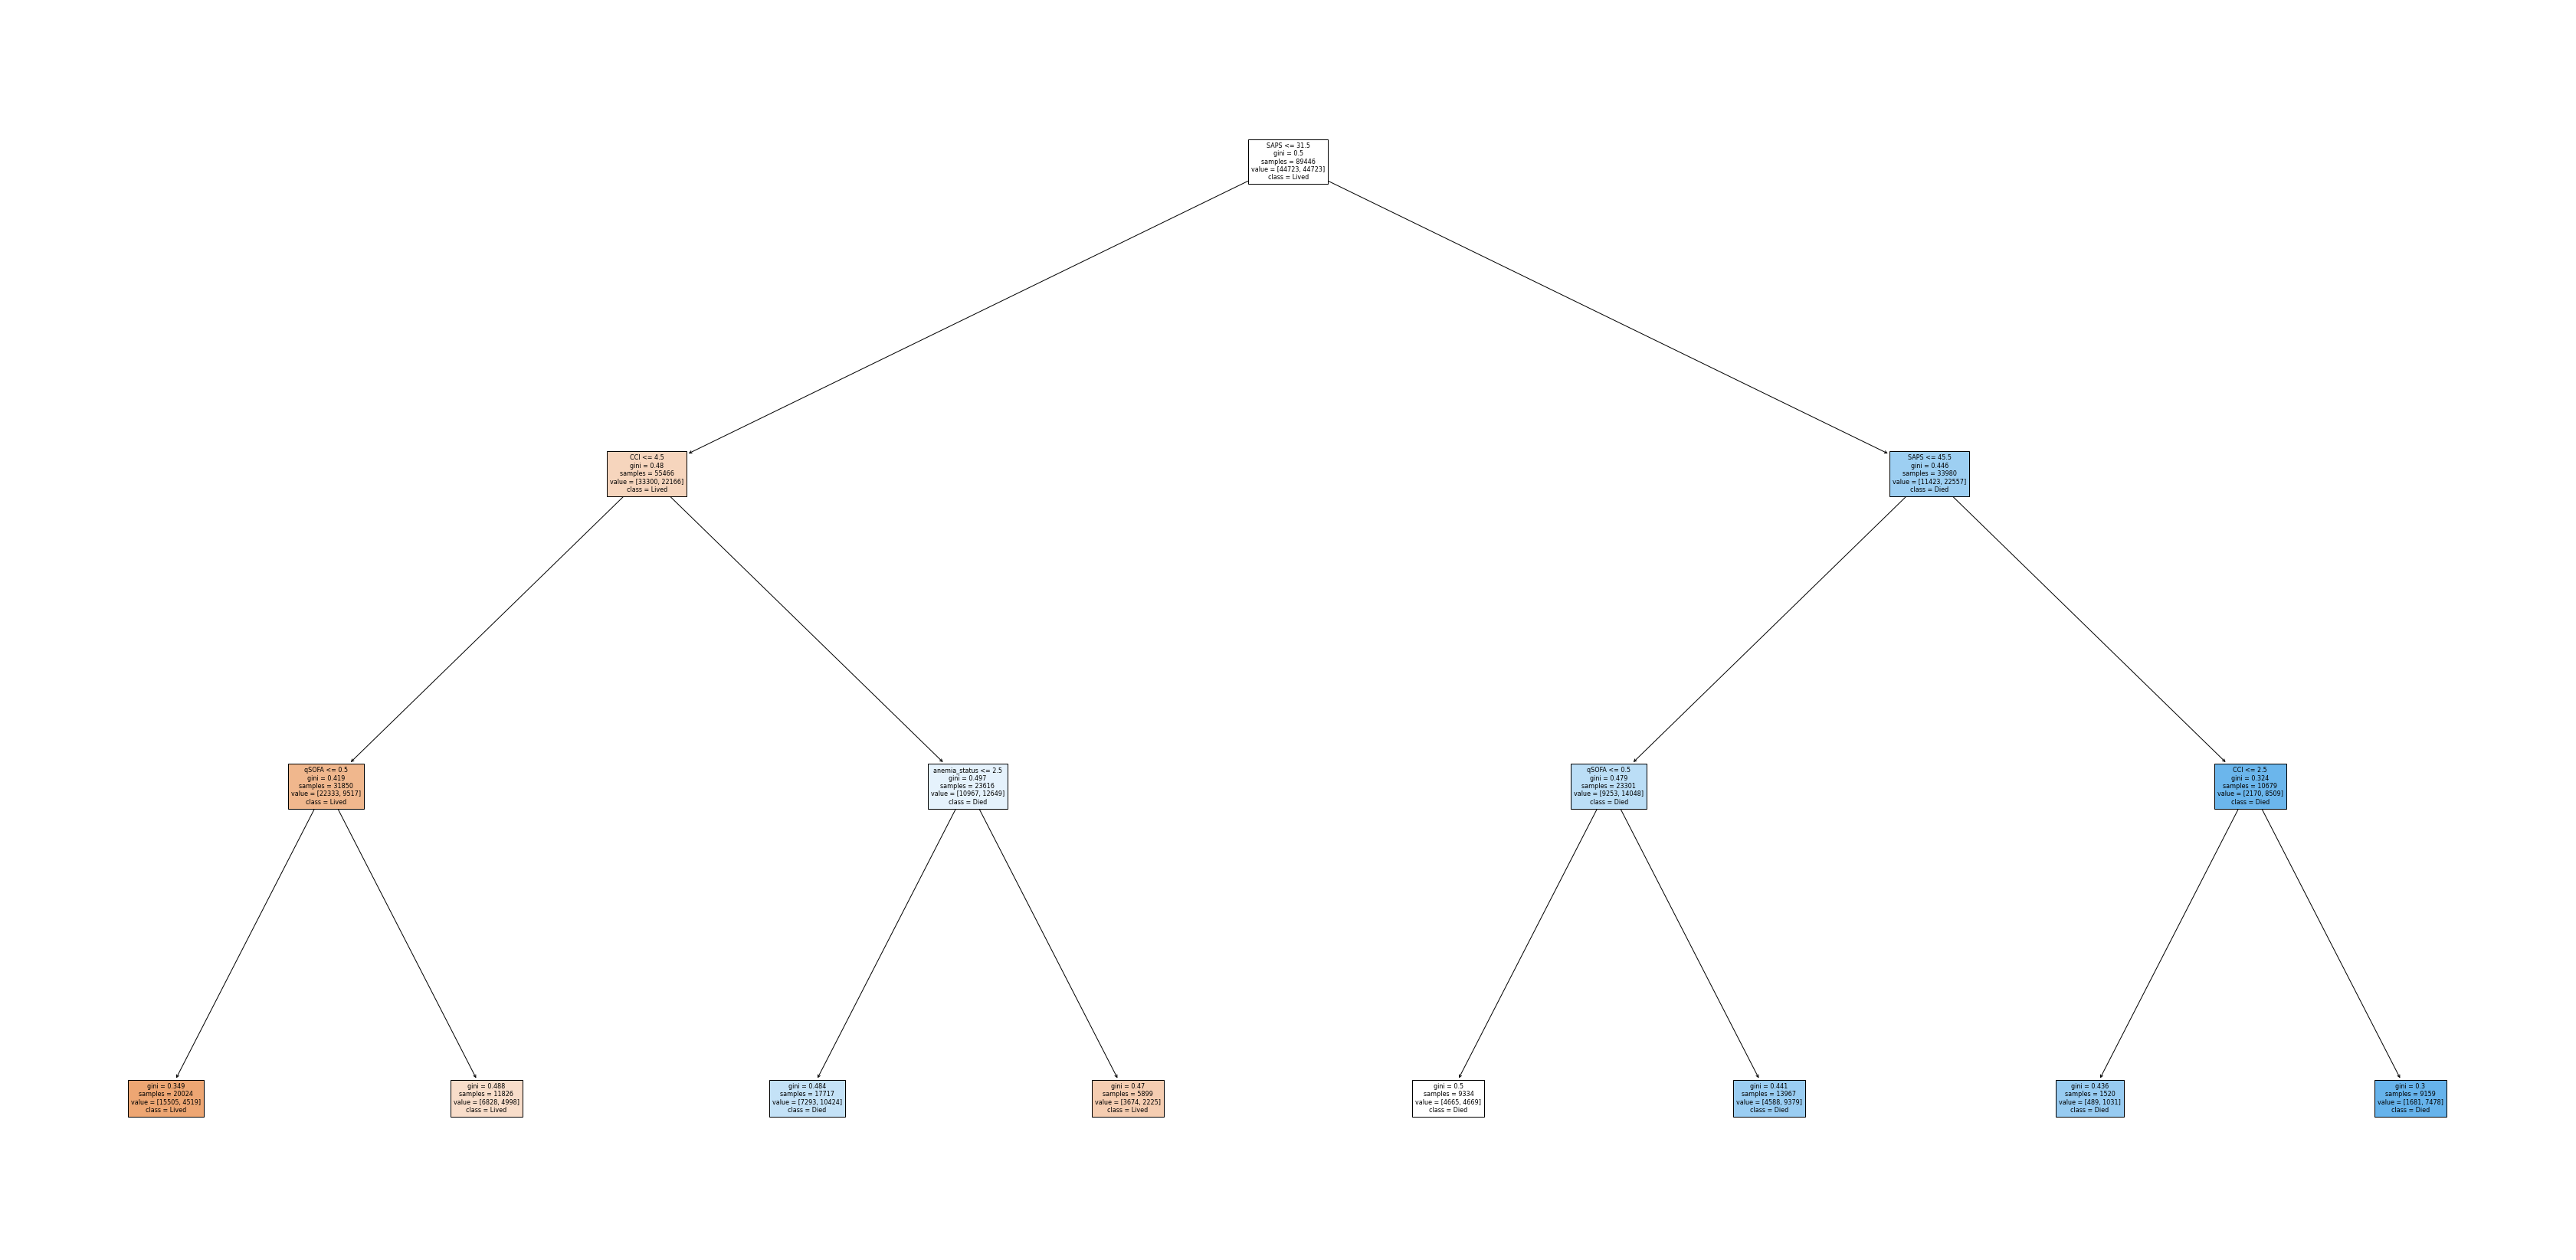

In [116]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [117]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D3_NCBL.png')

True

## 2: Decision Tree (Max Depth=4)

In [118]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: anemia_status Score: 0.06866
Feature: CCI Score: 0.27636
Feature: albumin_24hrs Score: 0.01676
Feature: qSOFA Score: 0.15441
Feature: SAPS Score: 0.48381


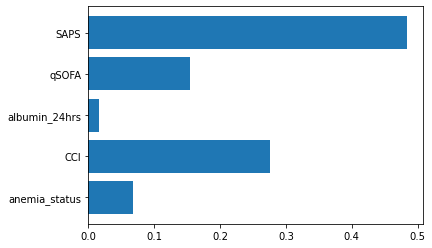

In [119]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [120]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [121]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[25150 19573]
 [10024 34699]]


In [122]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63     44723
           1       0.64      0.78      0.70     44723

    accuracy                           0.67     89446
   macro avg       0.68      0.67      0.67     89446
weighted avg       0.68      0.67      0.67     89446



In [123]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[6267 4882]
 [ 279  794]]


In [124]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.56      0.71     11149
           1       0.14      0.74      0.24      1073

    accuracy                           0.58     12222
   macro avg       0.55      0.65      0.47     12222
weighted avg       0.89      0.58      0.67     12222



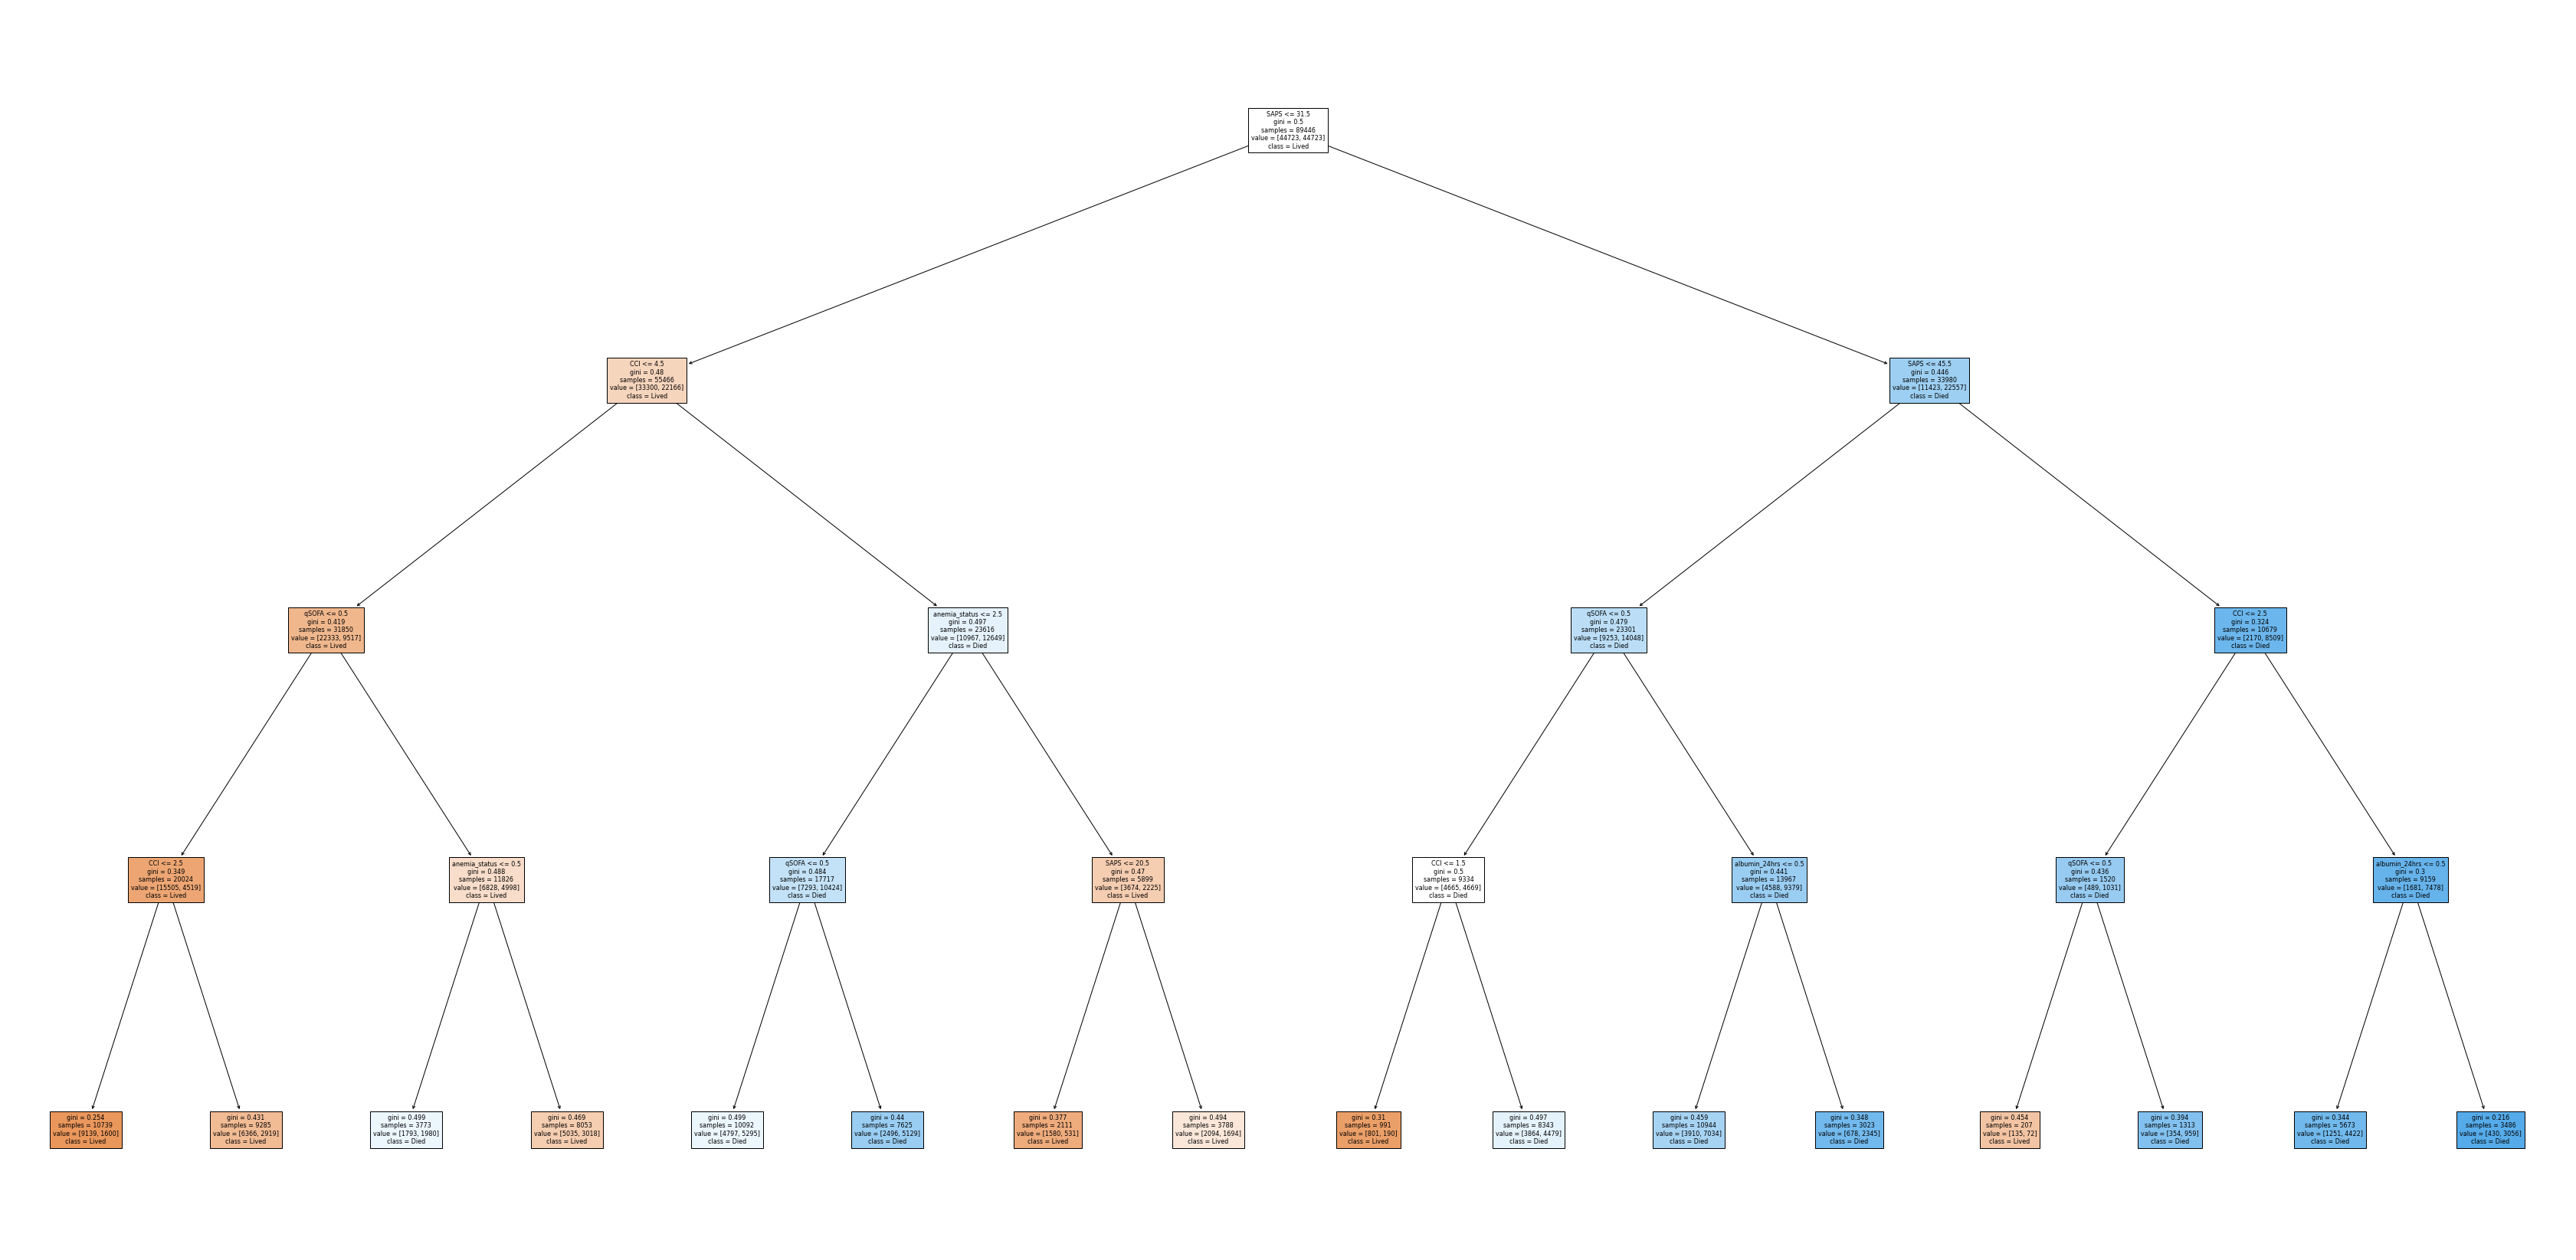

In [125]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [126]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D4_NCBL.png')

True

## 3: Decision Tree 

In [127]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

Feature: anemia_status Score: 0.08584
Feature: CCI Score: 0.27581
Feature: albumin_24hrs Score: 0.03116
Feature: qSOFA Score: 0.14526
Feature: SAPS Score: 0.46194


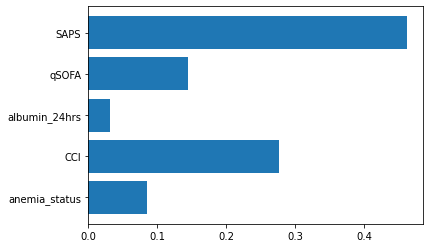

In [128]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [129]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [130]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[31185 13538]
 [14874 29849]]


In [131]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69     44723
           1       0.69      0.67      0.68     44723

    accuracy                           0.68     89446
   macro avg       0.68      0.68      0.68     89446
weighted avg       0.68      0.68      0.68     89446



In [132]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7739 3410]
 [ 369  704]]


In [133]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     11149
           1       0.17      0.66      0.27      1073

    accuracy                           0.69     12222
   macro avg       0.56      0.68      0.54     12222
weighted avg       0.89      0.69      0.76     12222



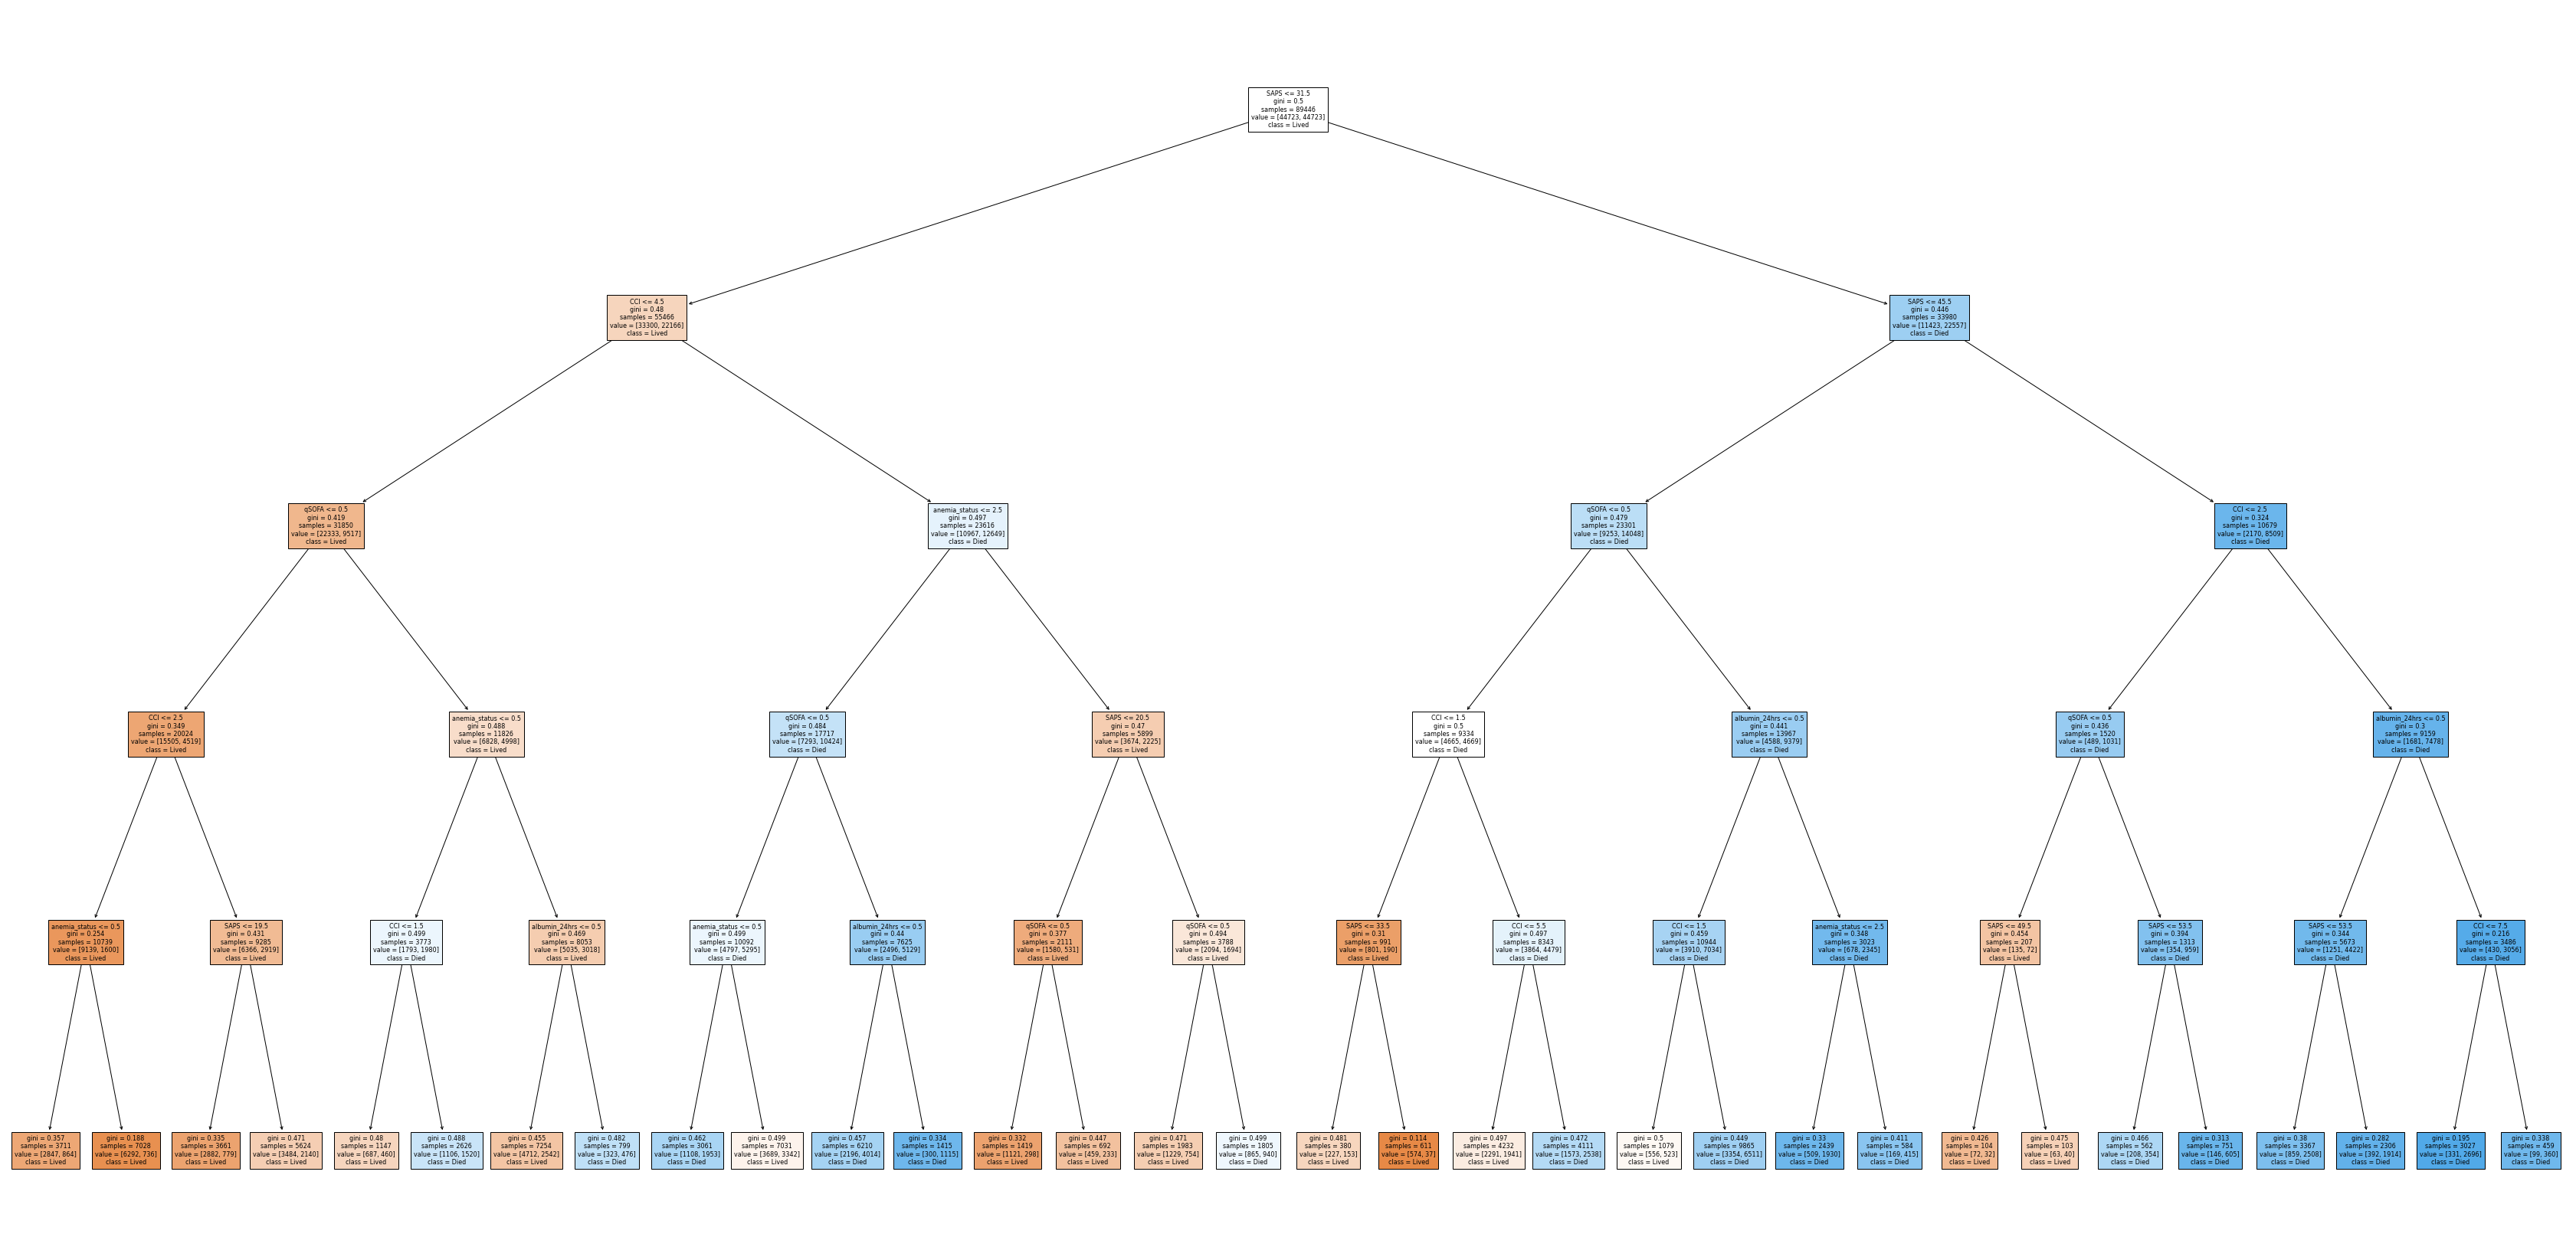

In [134]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [135]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D5_NCBL.png')

True

## 4: Decision Tree 

In [136]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

Feature: anemia_status Score: 0.09590
Feature: CCI Score: 0.26861
Feature: albumin_24hrs Score: 0.03486
Feature: qSOFA Score: 0.12995
Feature: SAPS Score: 0.47068


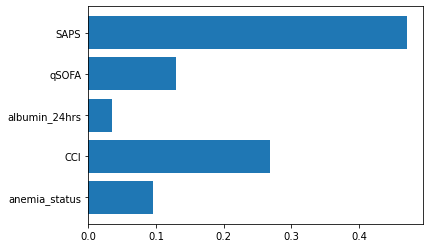

In [137]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [138]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [139]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[30770 13953]
 [13494 31229]]


In [140]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69     44723
           1       0.69      0.70      0.69     44723

    accuracy                           0.69     89446
   macro avg       0.69      0.69      0.69     89446
weighted avg       0.69      0.69      0.69     89446



In [141]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7644 3505]
 [ 357  716]]


In [142]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     11149
           1       0.17      0.67      0.27      1073

    accuracy                           0.68     12222
   macro avg       0.56      0.68      0.53     12222
weighted avg       0.89      0.68      0.75     12222



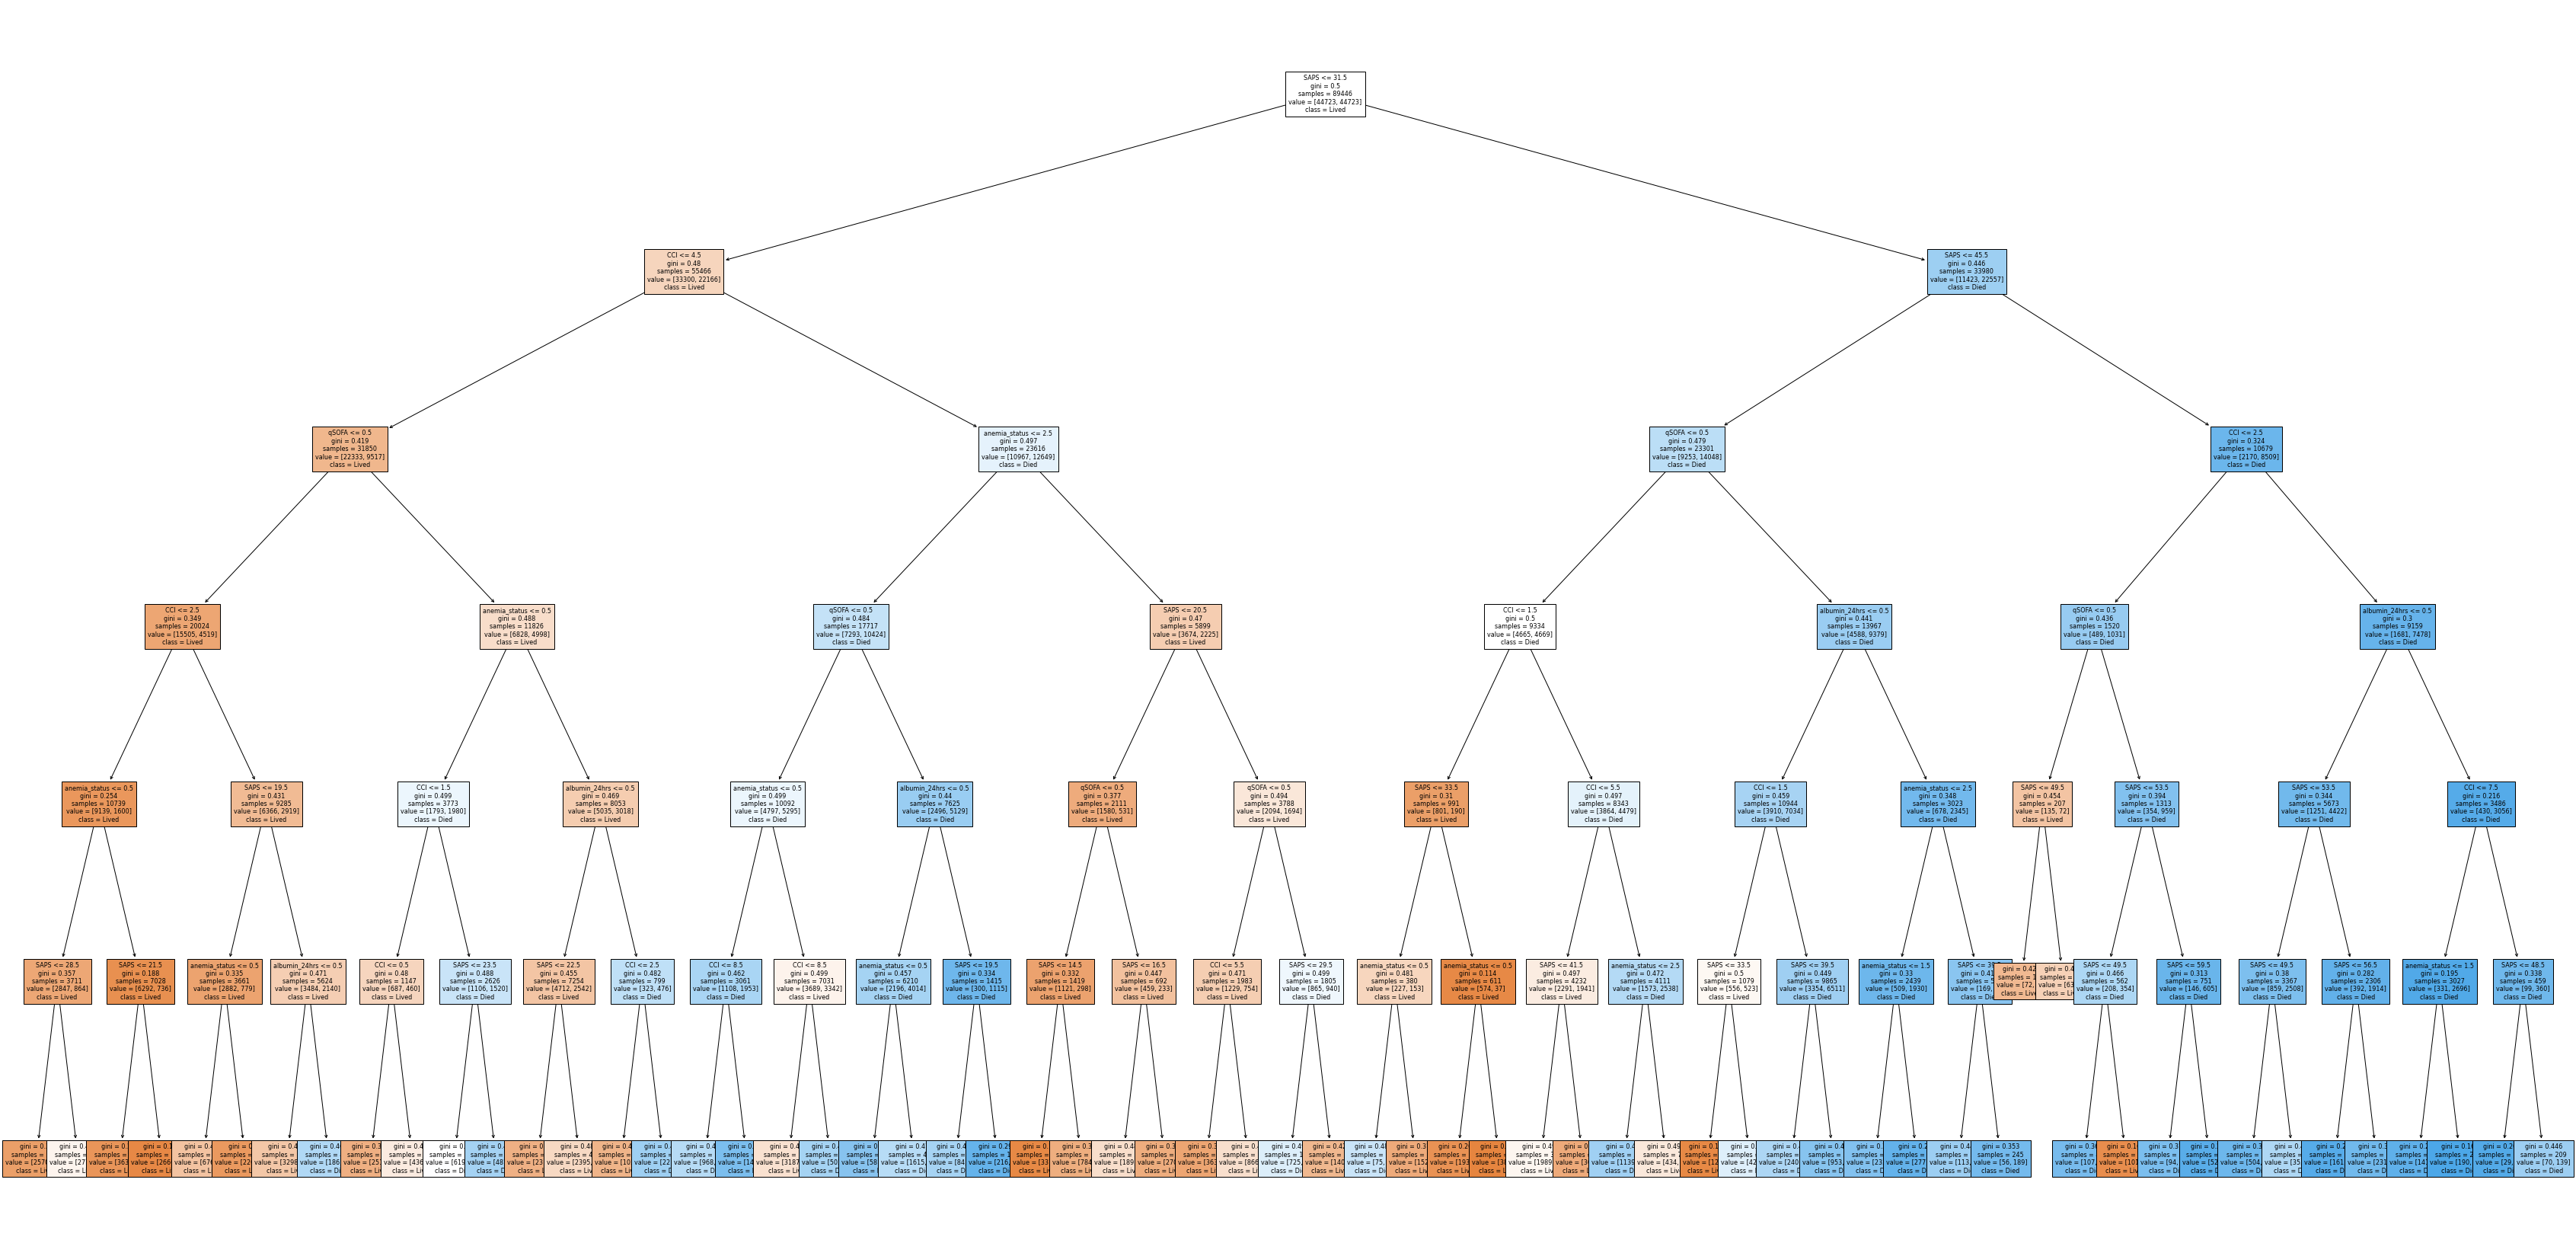

In [143]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [144]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D6_NCBL.png')

True

## 5: Decision Tree 

In [145]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: anemia_status Score: 0.09236
Feature: CCI Score: 0.25386
Feature: albumin_24hrs Score: 0.03351
Feature: qSOFA Score: 0.11989
Feature: SAPS Score: 0.50037


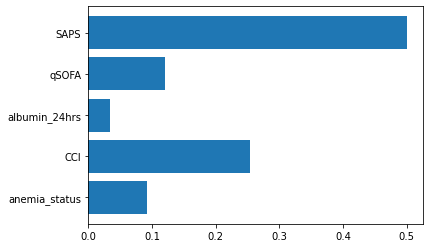

In [146]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [147]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [148]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[32063 12660]
 [13854 30869]]


In [149]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     44723
           1       0.71      0.69      0.70     44723

    accuracy                           0.70     89446
   macro avg       0.70      0.70      0.70     89446
weighted avg       0.70      0.70      0.70     89446



In [150]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7999 3150]
 [ 420  653]]


In [151]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     11149
           1       0.17      0.61      0.27      1073

    accuracy                           0.71     12222
   macro avg       0.56      0.66      0.54     12222
weighted avg       0.88      0.71      0.77     12222



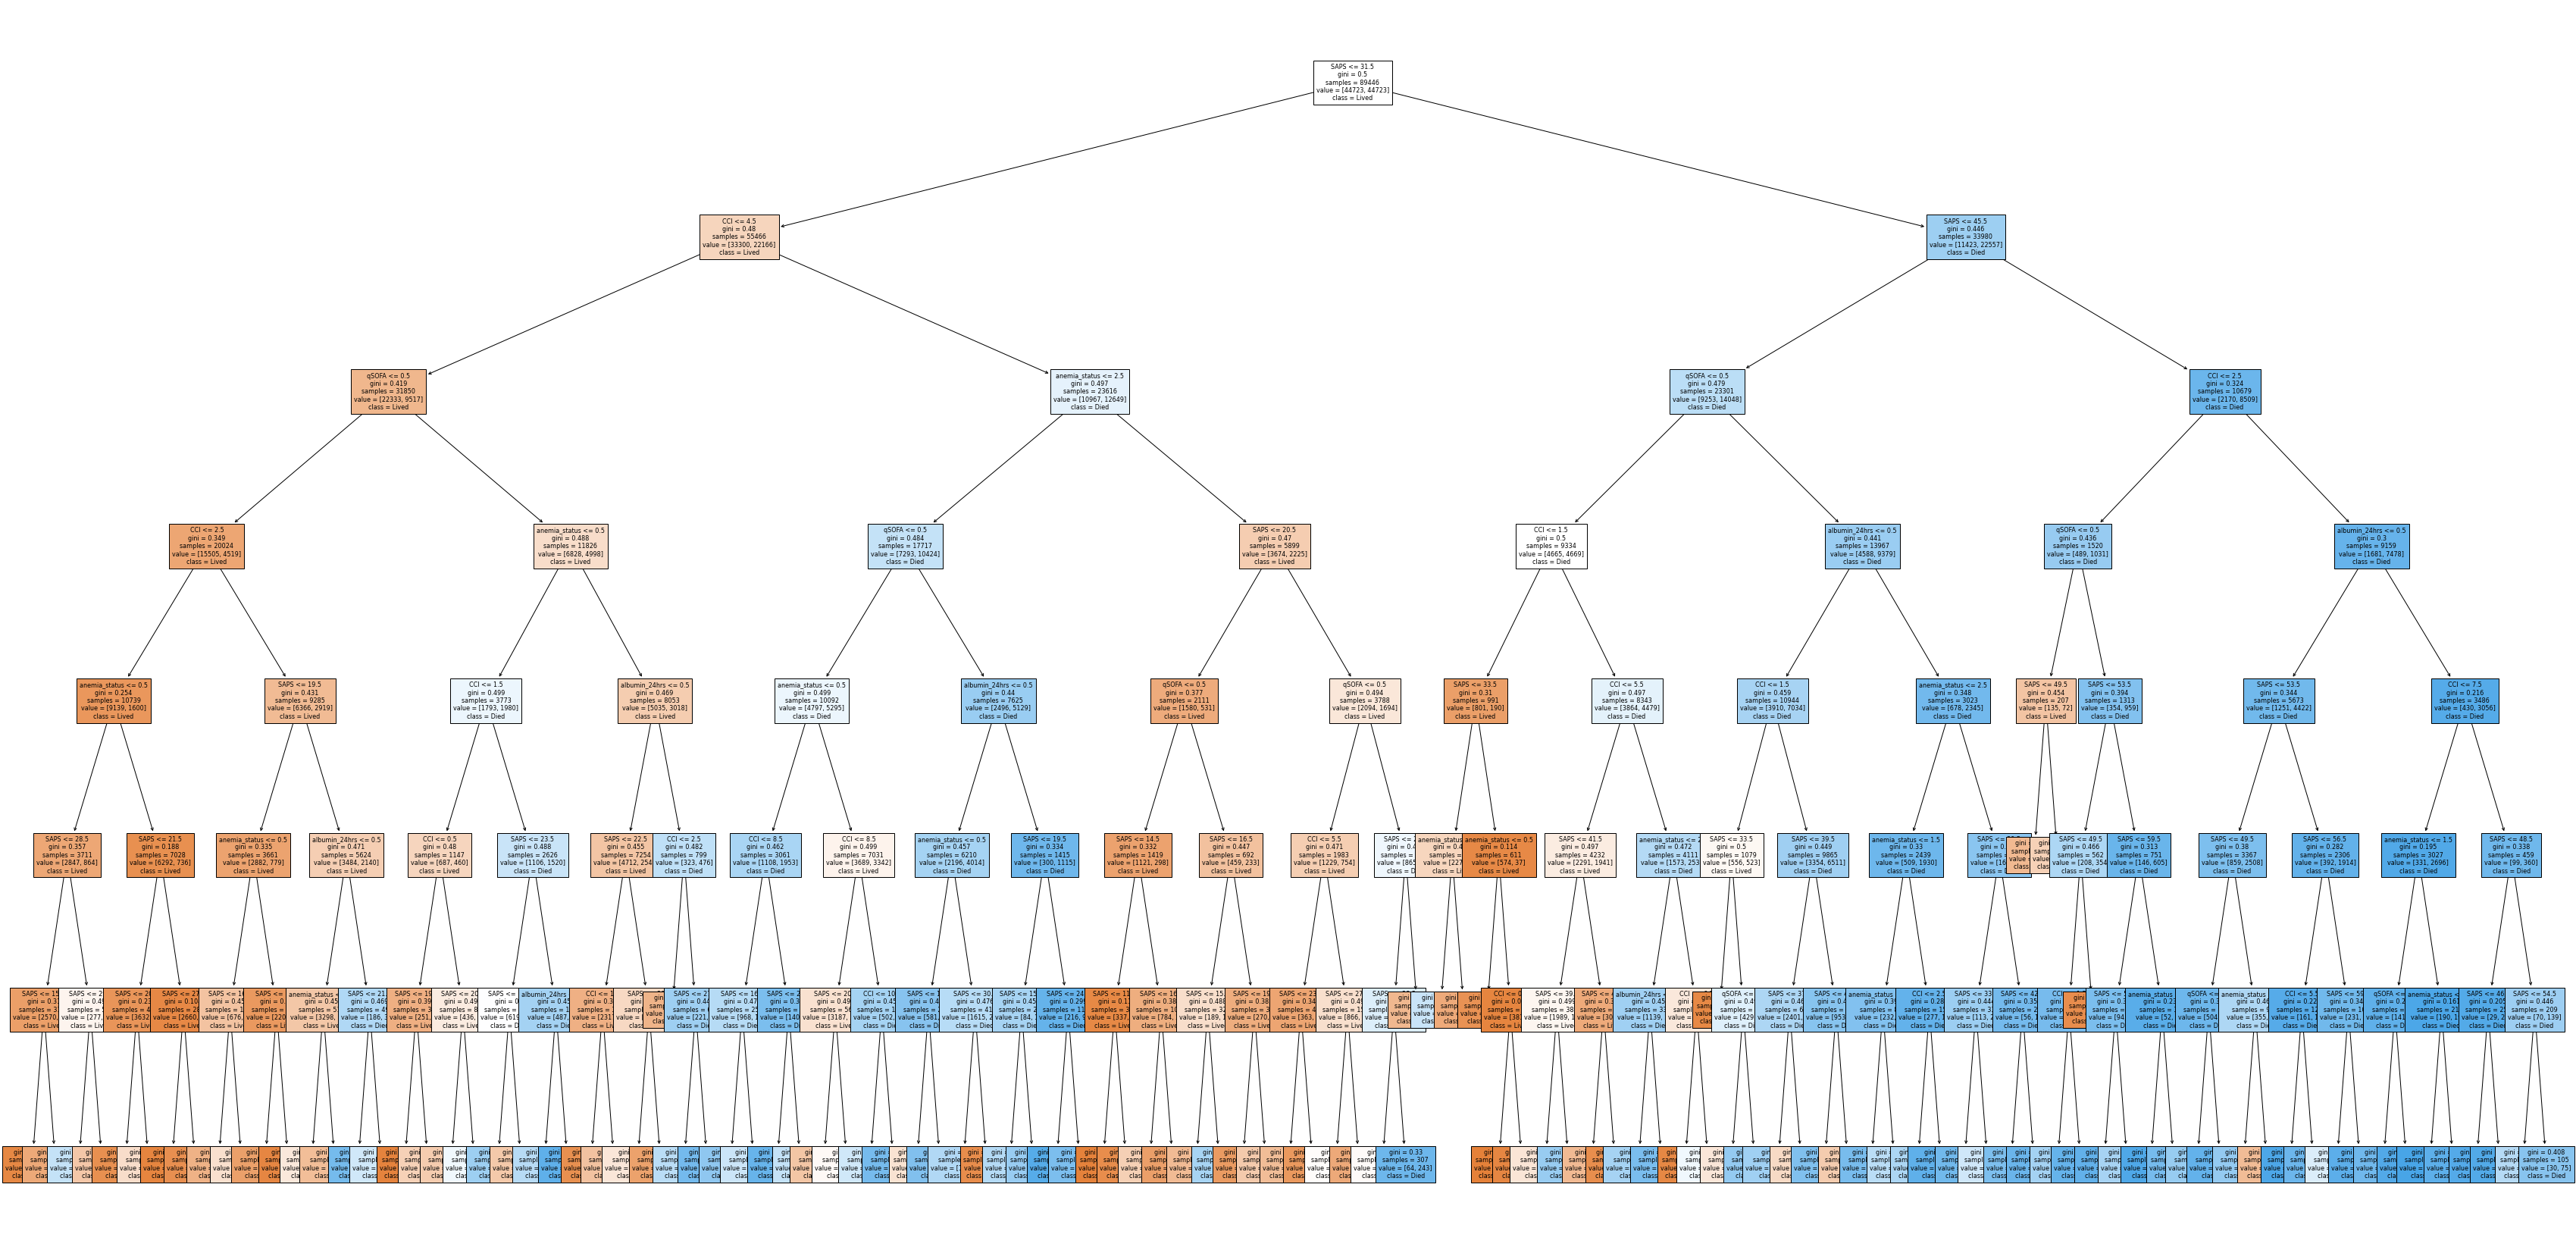

In [152]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [153]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D7_NCBL.png')

True

## Random Forest

In [154]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [155]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [156]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[31035 13688]
 [11849 32874]]


In [157]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71     44723
           1       0.71      0.74      0.72     44723

    accuracy                           0.71     89446
   macro avg       0.71      0.71      0.71     89446
weighted avg       0.71      0.71      0.71     89446



In [158]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7717 3432]
 [ 347  726]]


In [159]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     11149
           1       0.17      0.68      0.28      1073

    accuracy                           0.69     12222
   macro avg       0.57      0.68      0.54     12222
weighted avg       0.89      0.69      0.76     12222



Feature: anemia_status Score: 0.09825
Feature: CCI Score: 0.27833
Feature: albumin_24hrs Score: 0.07045
Feature: qSOFA Score: 0.19511
Feature: SAPS Score: 0.35786


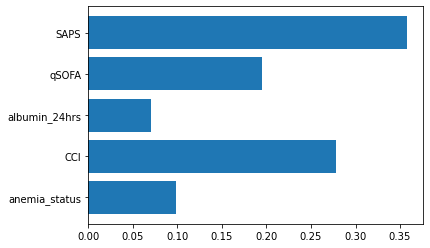

In [160]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()